In [6]:
import json
from queue import Queue
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
# Open the JSON file
with open('NFA.json', 'r',encoding="utf-8") as file:
    # Load JSON data from the file
    data = json.load(file)

In [8]:
# -*- coding: utf-8 -*-
all_pos_trans=[]        
for state,value in data.items():
    if state in ["startingState"]:continue
    for trans in value.keys():
        if trans in ["isTerminatingState","ε"]:continue
        all_pos_trans.append(trans)
print(all_pos_trans)

terminating_states=[]
# for state,value in data.items():
#     if state=="startingState":continue  
#     if value.get('isTerminatingState')==True:
#         terminating_states.append(state)
# print(terminating_states)

['a', 'b', 'c', 'b', 'd']


In [9]:
def rec_epsilon(state,new_state_list):

    epsilons=state.get('ε')
    if not epsilons:
        return new_state_list
    for next_state in epsilons:
        if next_state not in new_state_list:
            new_state_list.append(next_state)
            rec_epsilon(data.get(next_state),new_state_list)
    return new_state_list

In [10]:


# Now 'data' contains the contents of the JSON file as a Python dictionary
state_transition_state=[]
states_to_process_queue = Queue()
existing_states_queue = Queue()
startState=data.get('startingState')
all_states_dic={}

# all states that can be reached initially with epsilon transitions 
# combined in one initial state
DFA_startState=rec_epsilon(data.get(startState),[startState])
DFA_startState.sort()
states_to_process_queue.put(DFA_startState)
existing_states_queue.put(DFA_startState)

# print(DFA_startState)
while not states_to_process_queue.empty():
    dfa_state = states_to_process_queue.get()#all bubles
    #add it in a dic to rename
    lenth_dic=len(all_states_dic)
    if tuple(dfa_state) not in all_states_dic:
        all_states_dic[tuple(dfa_state)]=str(lenth_dic)
    print("dfa bubble ",dfa_state)
    for poss_trans in all_pos_trans:#all transition in all file
        state_to_add=[]
        is_terminal=False
        for element in state_transition_state:
            print(element, end=' ')
            print()
        for sub_state in dfa_state:#each s in the buble
            print("char in bubble ",sub_state)
            print(poss_trans,data.get(sub_state))
            if poss_trans in data.get(sub_state):#all transition in each s in buble
            # Loop over dictionary elements excluding certain values
                print("equallll")
                for succ_state in data.get(sub_state).get(poss_trans):
                    
                    state_to_add.append(succ_state)
                    succ_state_epsilons=rec_epsilon(data.get(succ_state),state_to_add)
                    state_to_add=succ_state_epsilons
                    for sub_stat_after_epsilon in state_to_add:
                        print(succ_state,data.get(succ_state),data.get(succ_state).get("isTerminatingState"))
                        if data.get(sub_stat_after_epsilon).get("isTerminatingState")==True:
                            is_terminal=True
                        
                    print("succ state ",succ_state)
        if len(state_to_add)==0:continue
        state_to_add.sort()
        if state_to_add not in existing_states_queue.queue and state_to_add not in states_to_process_queue.queue:
            existing_states_queue.put(state_to_add)
            states_to_process_queue.put(state_to_add)
        if is_terminal==True:
            terminating_states.append(tuple(state_to_add))
        state_transition_state.append((tuple(dfa_state),poss_trans,tuple(state_to_add)))
        

    
                   



dfa bubble  ['S1']
char in bubble  S1
a {'isTerminatingState': False, 'a': ['S2']}
equallll
S2 {'isTerminatingState': False, 'ε': ['S3']} False
S2 {'isTerminatingState': False, 'ε': ['S3']} False
succ state  S2
(('S1',), 'a', ('S2', 'S3')) 
char in bubble  S1
b {'isTerminatingState': False, 'a': ['S2']}
(('S1',), 'a', ('S2', 'S3')) 
char in bubble  S1
c {'isTerminatingState': False, 'a': ['S2']}
(('S1',), 'a', ('S2', 'S3')) 
char in bubble  S1
b {'isTerminatingState': False, 'a': ['S2']}
(('S1',), 'a', ('S2', 'S3')) 
char in bubble  S1
d {'isTerminatingState': False, 'a': ['S2']}
dfa bubble  ['S2', 'S3']
(('S1',), 'a', ('S2', 'S3')) 
char in bubble  S2
a {'isTerminatingState': False, 'ε': ['S3']}
char in bubble  S3
a {'isTerminatingState': False, 'b': ['S4']}
(('S1',), 'a', ('S2', 'S3')) 
char in bubble  S2
b {'isTerminatingState': False, 'ε': ['S3']}
char in bubble  S3
b {'isTerminatingState': False, 'b': ['S4']}
equallll
S4 {'isTerminatingState': False, 'ε': ['S11']} False
S4 {'isTer

In [11]:
print(all_states_dic)
print(terminating_states)

{('S1',): '0', ('S2', 'S3'): '1', ('S11', 'S12', 'S13', 'S15', 'S4', 'S5', 'S7', 'S9'): '2', ('S10', 'S11', 'S12', 'S13', 'S15', 'S5', 'S6', 'S7', 'S9'): '3', ('S10', 'S11', 'S12', 'S13', 'S15', 'S5', 'S7', 'S8', 'S9'): '4', ('S13', 'S14', 'S15', 'S16'): '5'}
[('S13', 'S14', 'S15', 'S16'), ('S13', 'S14', 'S15', 'S16'), ('S13', 'S14', 'S15', 'S16'), ('S13', 'S14', 'S15', 'S16')]


In [12]:
print(terminating_states)
# state_transition_state=[
#     (('S3', 'S1'), 'a', ('S2', 'S3')), 
# (('S3', 'S1'), 'c', ('S2',)), 
# (('S2', 'S3'), 'b', ('S6',)) ,
# ]
final_dict={"startingState":all_states_dic.get(tuple(DFA_startState))}
for tupl in state_transition_state:
    if all_states_dic.get(tupl[0]) not in final_dict.keys():

        final_dict[all_states_dic.get(tupl[0])] ={
            "isTerminatingState":tuple[0] in terminating_states,
            tupl[1]:[all_states_dic.get(tupl[2])]
        }
    elif all_states_dic.get(tupl[1]) not in final_dict[all_states_dic.get(tupl[0])].keys():
        final_dict[all_states_dic.get(tupl[0])][tupl[1]]=[all_states_dic.get(tupl[2])]
    else :
        final_dict[all_states_dic.get(tupl[0])][tupl[1]].append(all_states_dic.get(tupl[2]))
    
    if all_states_dic.get(tupl[2]) not in  final_dict.keys():
        
        final_dict[all_states_dic.get(tupl[2])] ={
            "isTerminatingState":tupl[2] in terminating_states
        }

print(final_dict)

with open("dfa.json", "w") as json_file:
    json.dump(final_dict, json_file, indent=4)



[('S13', 'S14', 'S15', 'S16'), ('S13', 'S14', 'S15', 'S16'), ('S13', 'S14', 'S15', 'S16'), ('S13', 'S14', 'S15', 'S16')]
{'startingState': '0', '0': {'isTerminatingState': False, 'a': ['1']}, '1': {'isTerminatingState': False, 'b': ['2']}, '2': {'isTerminatingState': False, 'b': ['3'], 'c': ['4'], 'd': ['5']}, '3': {'isTerminatingState': False, 'b': ['3'], 'c': ['4'], 'd': ['5']}, '4': {'isTerminatingState': False, 'b': ['3'], 'c': ['4'], 'd': ['5']}, '5': {'isTerminatingState': True, 'd': ['5']}}


False
False
False
False
False
True
0 1 a
1 2 b
2 3 b
2 4 c
2 5 d
3 3 b
3 4 c
3 5 d
4 3 b
4 4 c
4 5 d
5 5 d


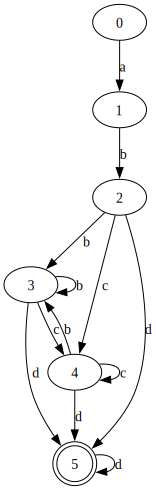

In [13]:
from graphviz import Digraph



# Create a new Digraph object
dot = Digraph()
for node in all_states_dic.values():
    print(final_dict[node]["isTerminatingState"])
    if final_dict[node]["isTerminatingState"]==True:
       
        dot.node(str(node), shape= "doublecircle")
    else:
        dot.node(str(node))


for state in all_states_dic:
    value=final_dict.get(all_states_dic[state])
    for a_trans,dests in value.items():
        if a_trans=="isTerminatingState":continue
        for dest in dests:
            print(all_states_dic[state], str(dest), a_trans)
            dot.edge(str(all_states_dic[state]),str(dest),label=a_trans)
            # if value == dest:
            #     dot.edge(value, value, label=a_trans + " (self-loop)")


# Render the graph into an image file
dot.render('graph_from_array', format='png', cleanup=True)

# # Display the graph
dot


In [15]:
print(all_states_dic.get("hell"))

None
